In [40]:
import pandas as pd
import numpy as np
import itertools, matplotlib

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [133]:
data = pd.read_csv('data/Christie_diagnosis_20180118.csv')
#data_small = data.sample(n=200)
X_TMCQ = data[['Y1_P_TMCQ_ACTIVCONT', 'Y1_P_TMCQ_ACTIVITY', 'Y1_P_TMCQ_AFFIL',
          'Y1_P_TMCQ_ANGER', 'Y1_P_TMCQ_FEAR', 'Y1_P_TMCQ_HIP',
           'Y1_P_TMCQ_IMPULS', 'Y1_P_TMCQ_INHIBIT', 'Y1_P_TMCQ_SAD',
           'Y1_P_TMCQ_SHY', 'Y1_P_TMCQ_SOOTHE', 'Y1_P_TMCQ_ASSERT',
           'Y1_P_TMCQ_ATTFOCUS', 'Y1_P_TMCQ_LIP', 'Y1_P_TMCQ_PERCEPT',
           'Y1_P_TMCQ_DISCOMF', 'Y1_P_TMCQ_OPENNESS', 'Y1_P_TMCQ_SURGENCY',
           'Y1_P_TMCQ_EFFCONT', 'Y1_P_TMCQ_NEGAFFECT']]

X_TMCQ_nonull = X_TMCQ[X_TMCQ.isnull().sum(axis=1) == 0]

# Unsupervised Learning

[Subtyping ADHD Using Tempermant Dimensions](https://jamanetwork.com/journals/jamapsychiatry/fullarticle/1885709)

The above is a paper written by Dr. Karalunas that utilized community detection analysis on the Temperment in Middle Childhood Questionnaire (TMCQ).
They had 437 children and used the TMCQ from year 1. 
They specifically used the [Fast Greedy algorithm](https://arxiv.org/abs/cond-mat/0408187) and found 3 profiles of children, which they labeled as "mild", "surgent", and "irritable".

I tried different clustering algorithms to see if the same profiles seem to exist.
I also attempted to replicate this analysis on the full 901 dataset using community detection. ([community detection in python](https://yoyoinwanderland.github.io/2017/08/08/Community-Detection-in-Python/)).

They used physiological and MRI data to externally validate these profiles, which I don't really have. But I might be able to glean something interesting from the neuropsych data? Maybe? IDK. Focus on "are the profiles there".

## KMeans Clustering

In [134]:
from clustering_functions import wcss_and_silhouette, silhouette_graph

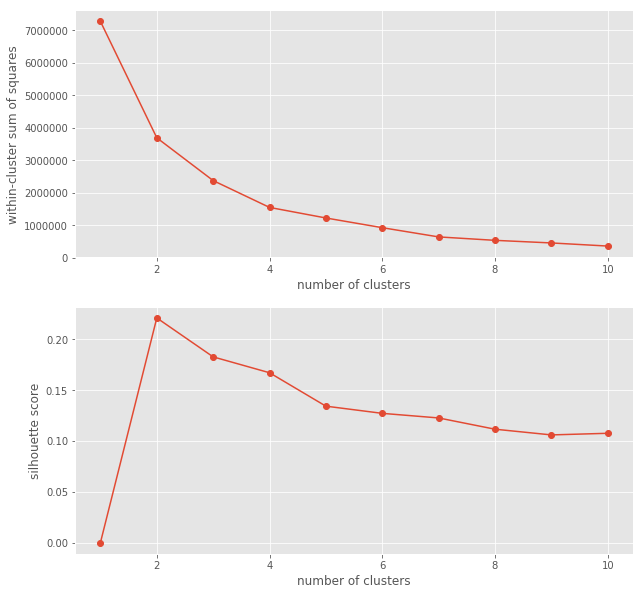

In [135]:
fig, axs = plt.subplots(2,1,figsize=(10,10))
wcss_and_silhouette(X_TMCQ_nonull, axs)

For n_clusters = 2 The average silhouette_score is : 0.221222089775
For n_clusters = 3 The average silhouette_score is : 0.18280124441
For n_clusters = 4 The average silhouette_score is : 0.169858330134
For n_clusters = 5 The average silhouette_score is : 0.134280526235


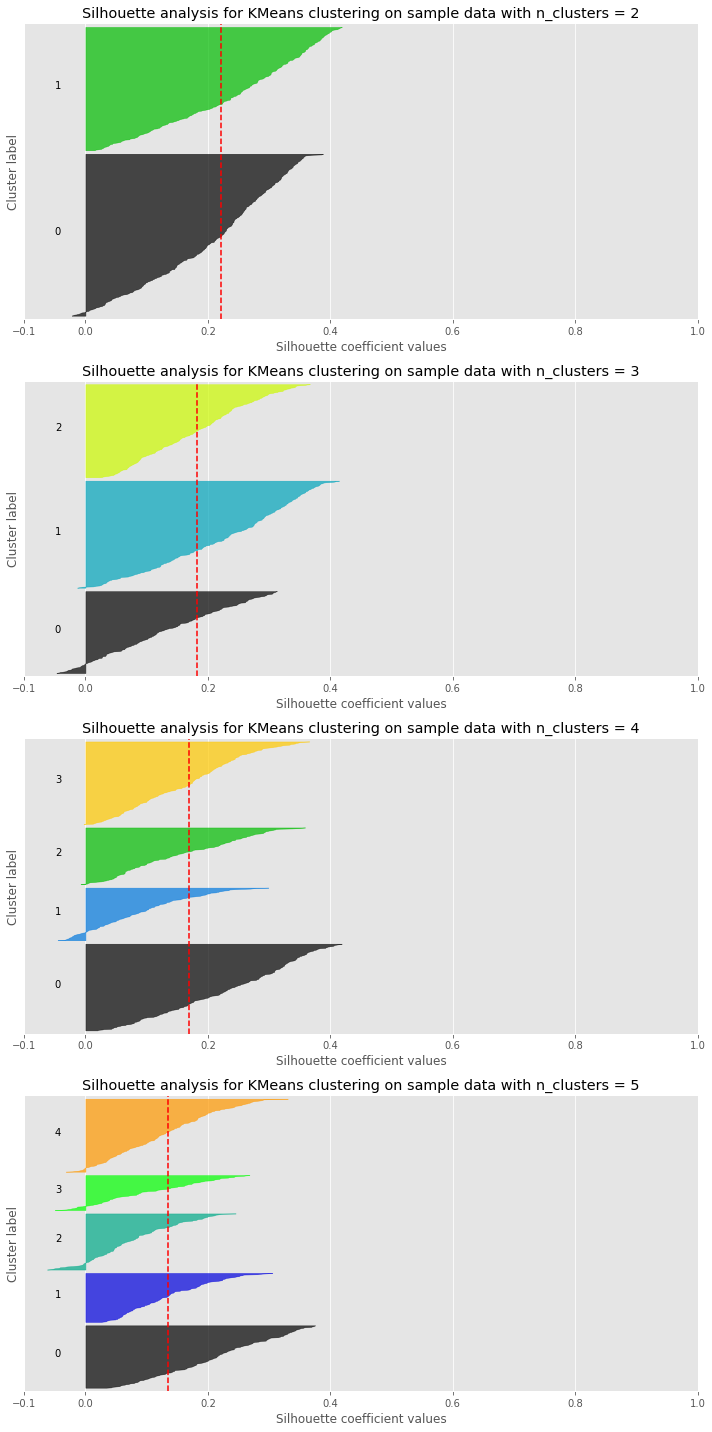

In [136]:
fig, axs = plt.subplots(4,1, figsize=(10,20))
silhouette_graph(X_TMCQ_nonull, axs)
plt.tight_layout()

## K = 2

It seems like K=2 is the best option for this data. I will thus explore the phenotypes of such.

In [101]:
km = KMeans(2)
y = km.fit_predict(X_TMCQ_nonull)

In [102]:
k2_df = X_TMCQ_nonull.copy()
k2_df['cluster'] = y

In [103]:
k2_df['DX'] = train_data.loc[X_TMCQ_nonull.index,'DX']
k2_df['DXSUB'] = train_data.loc[X_TMCQ_nonull.index,'DXSUB']

/home/christie/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:1020: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


In [104]:
cluster0 = k2_df.loc[k2_df[k2_df['cluster']==0].index,:]
cluster1 = k2_df.loc[k2_df[k2_df['cluster']==1].index,:]

In [105]:
cluster0['DX'].value_counts()

3.0    226
1.0    128
Name: DX, dtype: int64

In [106]:
cluster1['DX'].value_counts()

3.0    150
1.0     87
Name: DX, dtype: int64

Here, it's easy to see that cluster 0 roughly corresponds to Control, cluster 1 corresponds to ADHD.

In [107]:
cluster0['DXSUB'].value_counts()

5.0    161
1.0    128
3.0     62
4.0      3
Name: DXSUB, dtype: int64

In [108]:
cluster1['DXSUB'].value_counts()

5.0    106
1.0     87
3.0     37
4.0      7
Name: DXSUB, dtype: int64

DXSUB is still pretty well partitioned - Cluster 1 contains more ADHD subjects than cluster 0

In [94]:
cluster0.mean()

Y1_P_TMCQ_ACTIVCONT    3.660398
Y1_P_TMCQ_ACTIVITY     3.788659
Y1_P_TMCQ_AFFIL        4.293956
Y1_P_TMCQ_ANGER        2.403905
Y1_P_TMCQ_FEAR         2.120357
Y1_P_TMCQ_HIP          3.375730
Y1_P_TMCQ_IMPULS       2.341626
Y1_P_TMCQ_INHIBIT      3.762143
Y1_P_TMCQ_SAD          2.163967
Y1_P_TMCQ_SHY          2.450933
Y1_P_TMCQ_SOOTHE       3.953786
Y1_P_TMCQ_ASSERT       3.593238
Y1_P_TMCQ_ATTFOCUS     3.855524
Y1_P_TMCQ_LIP          3.863552
Y1_P_TMCQ_PERCEPT      3.296819
Y1_P_TMCQ_DISCOMF      2.185244
Y1_P_TMCQ_OPENNESS     4.143952
Y1_P_TMCQ_SURGENCY     3.571152
Y1_P_TMCQ_EFFCONT      3.687687
Y1_P_TMCQ_NEGAFFECT    2.183937
cluster                0.000000
DX                     1.424000
DXSUB                  1.660000
dtype: float64

In [95]:
cluster1.mean()

Y1_P_TMCQ_ACTIVCONT    3.016734
Y1_P_TMCQ_ACTIVITY     4.017794
Y1_P_TMCQ_AFFIL        4.192547
Y1_P_TMCQ_ANGER        3.350290
Y1_P_TMCQ_FEAR         2.504900
Y1_P_TMCQ_HIP          3.702910
Y1_P_TMCQ_IMPULS       3.685979
Y1_P_TMCQ_INHIBIT      2.620352
Y1_P_TMCQ_SAD          2.798859
Y1_P_TMCQ_SHY          2.450242
Y1_P_TMCQ_SOOTHE       3.130804
Y1_P_TMCQ_ASSERT       3.773789
Y1_P_TMCQ_ATTFOCUS     2.176263
Y1_P_TMCQ_LIP          3.580880
Y1_P_TMCQ_PERCEPT      3.338345
Y1_P_TMCQ_DISCOMF      2.707981
Y1_P_TMCQ_OPENNESS     4.100600
Y1_P_TMCQ_SURGENCY     3.756821
Y1_P_TMCQ_EFFCONT      2.946515
Y1_P_TMCQ_NEGAFFECT    2.846245
cluster                1.000000
DX                     2.860870
DXSUB                  4.252174
dtype: float64

## Conclusions

KMeans does not appear to be giving great clusters on control+adhd dataset. n=2 clusters appears to be the best.

# K-Means on ADHD

Following the JAMA paper, I will now examine the ADHD sample and control sample separately for clusters.

In [137]:
data = pd.read_csv('data/Christie_diagnosis_20180118.csv')
data_ADHD = data[data['DX'] == 3]
#data_small = data.sample(n=200)
X_TMCQ_ADHD = data_ADHD[['Y1_P_TMCQ_ACTIVCONT', 'Y1_P_TMCQ_ACTIVITY', 'Y1_P_TMCQ_AFFIL',
          'Y1_P_TMCQ_ANGER', 'Y1_P_TMCQ_FEAR', 'Y1_P_TMCQ_HIP',
           'Y1_P_TMCQ_IMPULS', 'Y1_P_TMCQ_INHIBIT', 'Y1_P_TMCQ_SAD',
           'Y1_P_TMCQ_SHY', 'Y1_P_TMCQ_SOOTHE', 'Y1_P_TMCQ_ASSERT',
           'Y1_P_TMCQ_ATTFOCUS', 'Y1_P_TMCQ_LIP', 'Y1_P_TMCQ_PERCEPT',
           'Y1_P_TMCQ_DISCOMF', 'Y1_P_TMCQ_OPENNESS', 'Y1_P_TMCQ_SURGENCY',
           'Y1_P_TMCQ_EFFCONT', 'Y1_P_TMCQ_NEGAFFECT']]

X_TMCQ_nonull_ADHD = X_TMCQ_ADHD[X_TMCQ_ADHD.isnull().sum(axis=1) == 0]

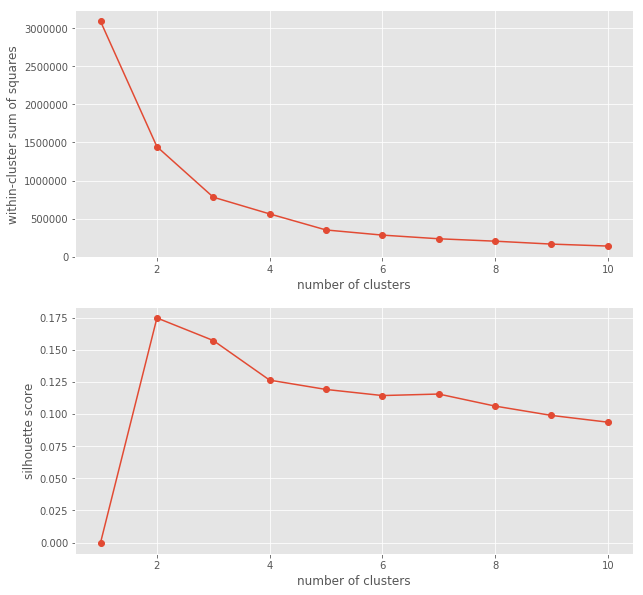

In [138]:
fig, axs = plt.subplots(2,1,figsize=(10,10))
wcss_and_silhouette(X_TMCQ_nonull_ADHD, axs)

For n_clusters = 2 The average silhouette_score is : 0.174682623046
For n_clusters = 3 The average silhouette_score is : 0.158655534778
For n_clusters = 4 The average silhouette_score is : 0.124355106702
For n_clusters = 5 The average silhouette_score is : 0.118686464313


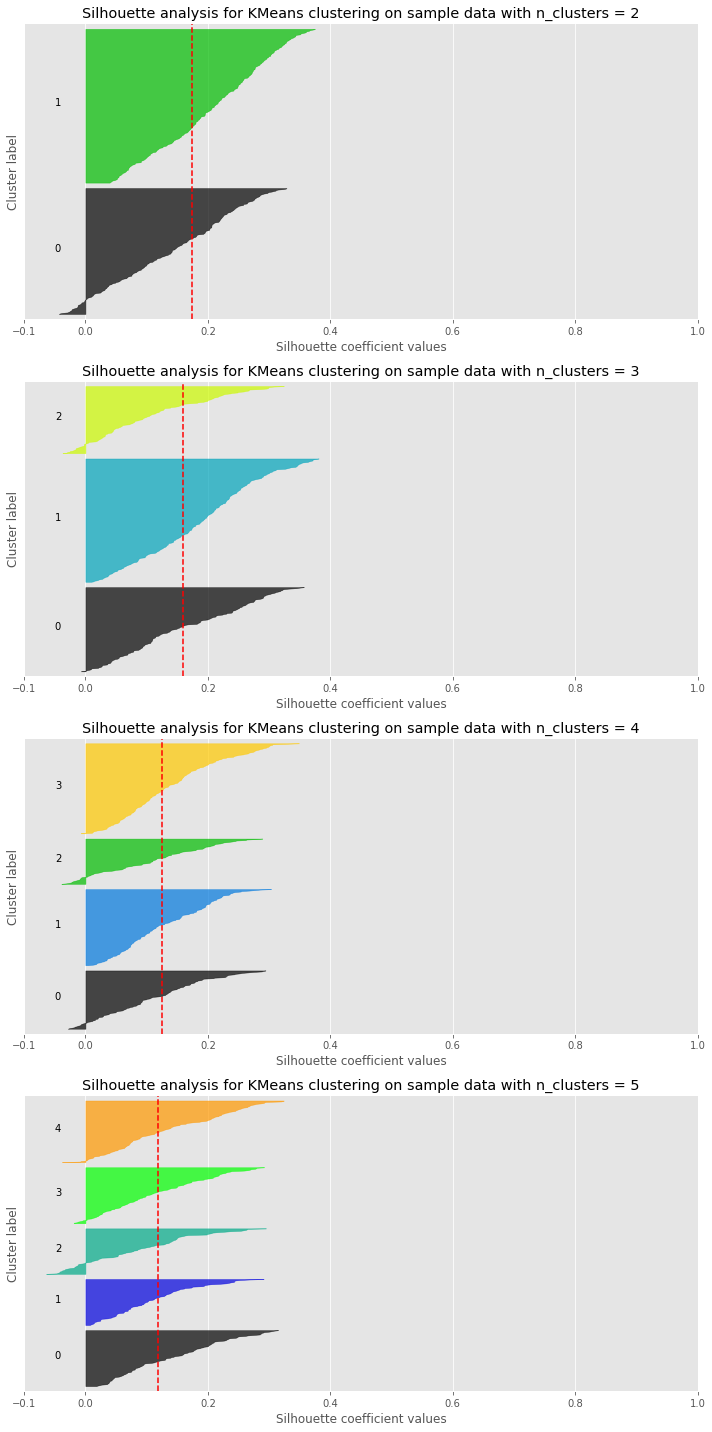

In [141]:
fig, axs = plt.subplots(4,1, figsize=(10,20))
silhouette_graph(X_TMCQ_nonull_ADHD, axs)
plt.tight_layout()